<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-исходных-данных" data-toc-modified-id="Изучение-исходных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение исходных данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Графический-анализ-исходных-данных" data-toc-modified-id="Графический-анализ-исходных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Графический анализ исходных данных</a></span><ul class="toc-item"><li><span><a href="#График:-модели-самолетов-и-количество-рейсов" data-toc-modified-id="График:-модели-самолетов-и-количество-рейсов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>График: модели самолетов и количество рейсов</a></span></li><li><span><a href="#График:-города-и-количество-рейсов" data-toc-modified-id="График:-города-и-количество-рейсов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>График: города и количество рейсов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

**Цель проекта:** проанализировать спрос пассажиров на рейсы в российские города, где проходят крупнейшие культурные фестивали.

**Исходные данные:** результаты двух запросов из базы данных, выполненные на языке SQL (см. отдельные файлы к проекту).

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

## Изучение исходных данных

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Загружаем исходные файлы и выводим общую информацию об исходных данных.

In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

In [3]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
city_flights.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Пропусков в исходных данных не выявлено. Типы данных заданы верно.

Проверяем исходные данные на дупликаты

In [7]:
city_flights.duplicated().sum()

0

Дубликатов не выявлено.

Дополнительно выведем описательную статистику.

In [8]:
city_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


### Вывод:

Дубликатов, пропусков и каких либо других аномалий/ошибок в исходных данных не выявлено: можно переходить к анализу исходных данных.

## Графический анализ исходных данных

Выполним анализ исходных данных при помощи графиков.

### График: модели самолетов и количество рейсов

Построим график: модели самолетов и количество рейсов.

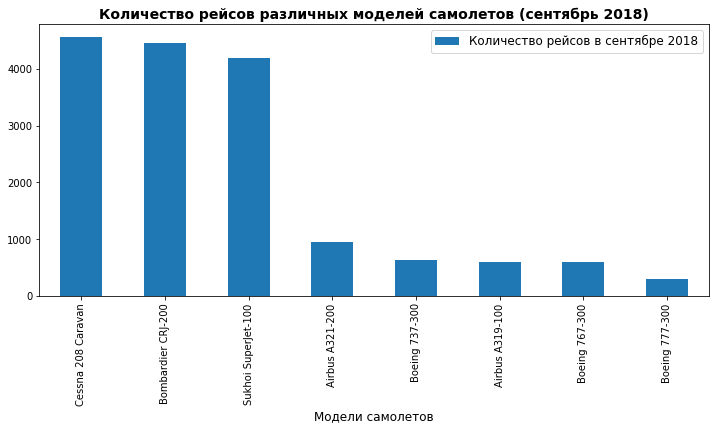

In [9]:
model_flights = model_flights.sort_values(by='flights_amount', ascending=False)
model_flights.plot(x='model', y='flights_amount', kind='bar', figsize=(12,5))
plt.legend(["Количество рейсов в сентябре 2018"], fontsize=12)
plt.xlabel("Модели самолетов", fontsize=12)
plt.title("Количество рейсов различных моделей самолетов (сентябрь 2018)", fontsize=14, fontweight='bold')
plt.show()

Как видно из графика, в рейтинге моделей самолетов лидирует Cessina 208 Caravan, второе место занимает Bombardier CRJ-200, третье - Sukhoi SuperJet-100. Лидерство Cessina 208 Caravan объясняется, вероятно, его небольшими размерами, данный самолет совершает много рейсов на небольшие дистанции с малым числом пассажиров. Из трех лидеров рейтинга самый большой самолет - Sukhoi SuperJet-100, его попадание в топ-3, вероятно, обусловлено тем, что рынок авиаперевозок России для него является "родным". Последнее место занимает в рейтинге модель Boeing 777-300, что, вероятно, объясняется большими размерами данного самолета.

Для большей наглядности построим также круговую диаграмму.

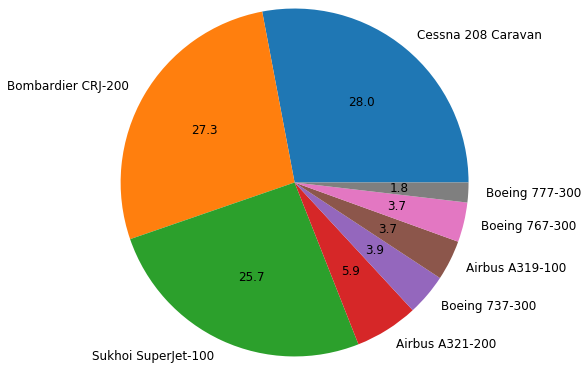

In [10]:
model_flights["flights_amount"].plot(kind='pie', radius=2, autopct='%.1f', textprops={'fontsize': 12}, labels=model_flights["model"])
plt.ylabel("")
plt.show()

Круговая диаграмма наглядно демонстрируют долю различных моделей самолетов по количеству рейсов. Доля для топ-3 моделей составляет: Cessina 208 Caravan - 28,0%, Bombardier CRJ-200 - 27,3% и  Sukhoi SuperJet-100 - 25,7%. Доля остальных моделей существенно меньше.

### График: города и количество рейсов

Построим график: города и количество рейсов.

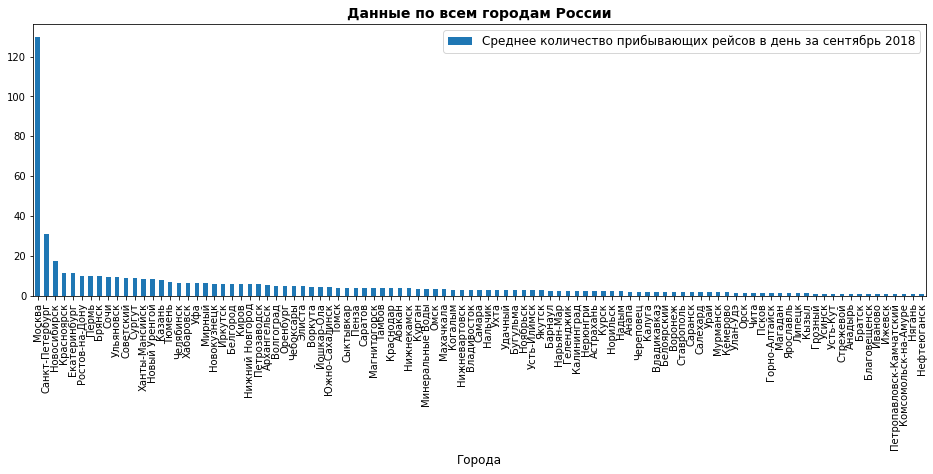

In [11]:
top_cities = city_flights.sort_values(by='average_flights', ascending=False).set_index('city')
top_cities = pd.Series(top_cities["average_flights"])
top_cities.plot(kind='bar', figsize=(16, 5))
plt.legend(["Среднее количество прибывающих рейсов в день за сентябрь 2018"], fontsize=12)
plt.xlabel("Города", fontsize=12)
plt.title("Данные по всем городам России", fontsize=14, fontweight='bold')
plt.show()

Ввиду большого количества городов, полученный график неудобен для анализа. Выведим таблицу топ-10 городов России по среднему количеству прибывающих рейсов в день (данные за сентябрь 2018 года).

In [12]:
top_cities[:10]

city
Москва             129.774194
Санкт-Петербург     31.161290
Новосибирск         17.322581
Красноярск          11.580645
Екатеринбург        11.322581
Ростов-на-Дону      10.193548
Пермь               10.129032
Брянск              10.000000
Сочи                 9.612903
Ульяновск            9.580645
Name: average_flights, dtype: float64

Добавим в данную таблицу пункт "другие города", который объединяет данные по всем города, непопавшим в топ-10.

In [13]:
top_10_cities = top_cities[:10].append(pd.Series([top_cities[10:].sum()], index=["другие города"]))
top_10_cities

Москва             129.774194
Санкт-Петербург     31.161290
Новосибирск         17.322581
Красноярск          11.580645
Екатеринбург        11.322581
Ростов-на-Дону      10.193548
Пермь               10.129032
Брянск              10.000000
Сочи                 9.612903
Ульяновск            9.580645
другие города      304.235681
dtype: float64

Построим график: топ-10 городов России по количеству прибывающих рейсов (без учета пункта "другие города").

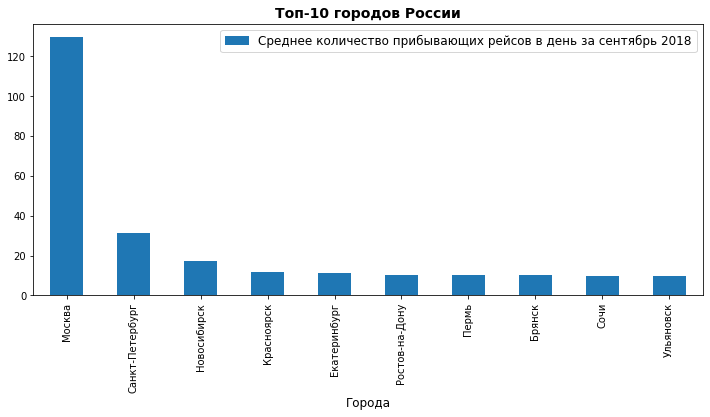

In [14]:
top_10_cities[:10].plot(kind='bar', figsize=(12,5))
plt.legend(["Среднее количество прибывающих рейсов в день за сентябрь 2018"], fontsize=12)
plt.xlabel("Города", fontsize=12)
plt.title("Топ-10 городов России", fontsize=14, fontweight='bold')
plt.show()

Как видно из таблицы и из графика, первое место по количеству прибывающих рейсов с большим отрывом занимает Москва, второе - Санкт-Петербург, третье - Новосибирск. Данный результата неудивителен. Москва с большим отрывом лидирует среди городов России по населению и размеру экономики. Санкт-Петербург по данным показателям уверенно занимает второе место, а Новосибирск является третьим городом России по населению и при этом довольно сильно удален от Москвы и Санкт-Петербурга и других крупных центров России, что делает особо предпочтительным использовании авиатранспорта для пассажирских перевозок. При этом несколько неожиданным выглядит присутствие относительно небольшого (50-е место в РФ по населению) и небогатого города - Брянска на 8 месте. Данный результат выглядит особенно аномальным, принимая во внимание также близкое расположение Брянска к Москве (имеется 3 экспресса в течение суток Москва-Брянск с временем пути всего 4 часа 5 минут).

Для наглядности и более детального анализа построим также две круговые диаграммы. Одну без учета пункта "другие города" и другую с учетом данного пункта.

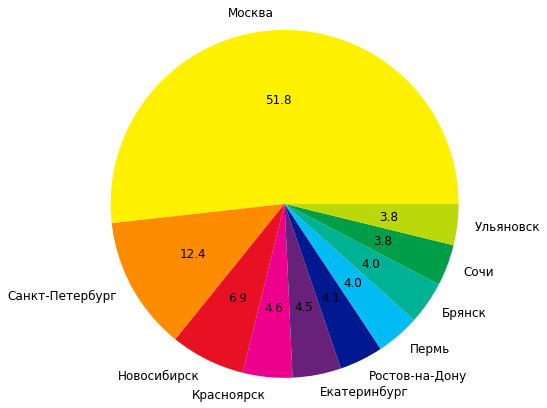

In [15]:
colors = ['#fff100', '#ff8c00', '#e81123', '#ec008c', '#68217a', '#00188f', '#00bcf2', '#00b294', '#009e49', '#bad80a', 
          '#F4D03F']
top_10_cities[:10].plot(kind='pie', colors=colors, radius=2, autopct='%.1f', textprops={'fontsize': 12})
plt.ylabel("")
plt.show()

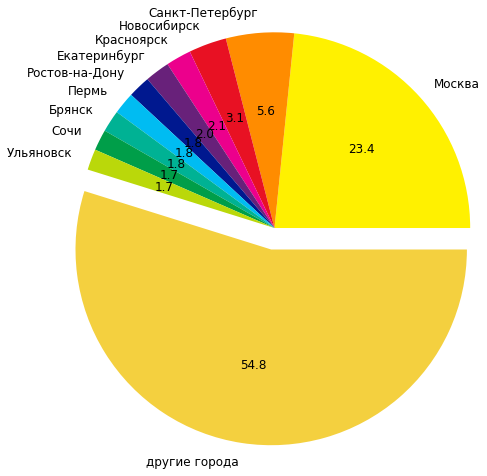

In [16]:
top_10_cities.plot(kind='pie', figsize=(12,5), colors=colors, radius=1.8, autopct='%.1f', 
                   textprops={'fontsize': 12}, explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2))
plt.ylabel("")
plt.show()

Круговые диаграммы наглядно демонстрируют доли различных городов России в пассажирских авиаперевозках (за единицу принято количество рейсов). На долю Москвы приходится 23,4% рейсов, на долю Санкт-Петербурга - 5,6% и на долю Новосибирска - 3,1%. Обращает на себя внимание довольно существенная доля (54,8%) городов не попавших в топ-10. Однако следует учитывать, что для более маленьких городов, вероятнее всего, характерны рейсы с меньшим количеством пассажиров по сравнению с крупными городами.

### Выводы

1. Топ 3 модели самолетов по количеству рейсов в России за сентябрь 2018 года: Cessina 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 (см. подраздел 2.1).
2. В рейтинге моделей по количеству рейсов представлены как очень небольшие самолеты типа Cessina 208 Caravan (до 13 пассажиров), так и очень крупные как, например, Boeing 777-300 (до 425 пассажиров). Таким образом, сравнение выполнено для несопоставимых между собой по количеству пассажиров и дальности полета самолетов. Эти обстоятельства необходимо учитывать при оценки объемов пассажиротрафика и общей длины выполненных рейсов.
3. Топ 3 города России по количеству прибывающих рейсов в России за сентябрь 2018 года: Москва, Санкт-Петербург и Новосибирск (см. подраздел 2.2). Данные результаты выглядят закономерными, учитывая население, размер экономики и географическое расположение указанных городов. При этом аномально высоким выглядит 8 место в рейтинге Брянска, принимая во внимание его относительно небольшое население (50 местов в РФ) и хорошую транспортную доступность до Москвы (три экспресса Москва-Брянск в сутки с временем пути всего 4 часа пять минут).

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод